# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Conservative

In [36]:
directory = './images/conservative'

# Crea la cartella se non esiste già
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
t_final = 0.5

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

dt = np.min( cf*dx/u_initial )   # Time step

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


In [37]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt/(dx)*(0.5 * u_current**2 - 0.5 * np.roll(u_current, 1)**2)    

    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,10.1)
        plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


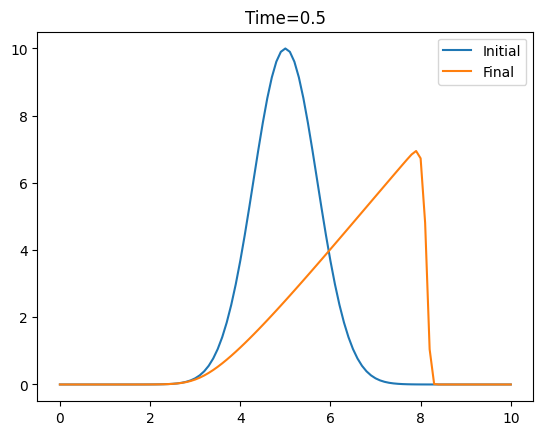

In [38]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.legend()
plt.show()

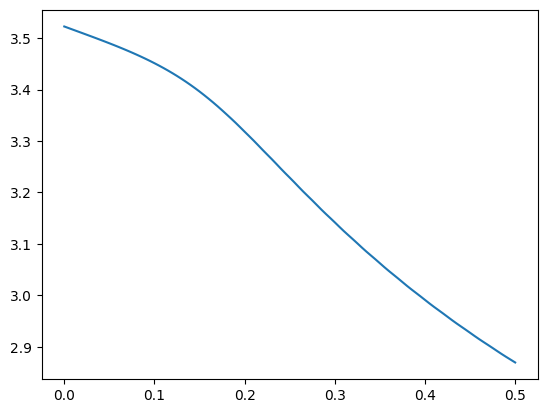

In [39]:
plt.plot(time,l2norm)
plt.show()

In [40]:
# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(len(files))

['fig_00040.png', 'fig_00060.png', 'fig_00100.png', 'fig_00020.png', 'fig_00090.png', 'fig_00010.png', 'fig_00070.png', 'fig_00080.png', 'fig_00050.png', 'fig_00000.png', 'fig_00030.png'] 

11


In [41]:
import imageio
with imageio.get_writer(f'./images/movie_cons.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(f'{directory}/'+file)
        writer.append_data(image)
        
files=[]

/tmp/ipykernel_128713/3623217329.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{directory}/'+file)


In [42]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images/movie_cons.mp4" type="video/mp4">
</video></div>""")

### Non conservative

In [43]:
directory = './images/non_conservative'

# Crea la cartella se non esiste già
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
t_final = 0.5

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

dt = np.min( cf*dx/u_initial )   # Time step

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


In [44]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt / dx * u_current * (u_current - np.roll(u_current, 1))    

    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,10.1)
        plt.savefig(f'{directory}/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


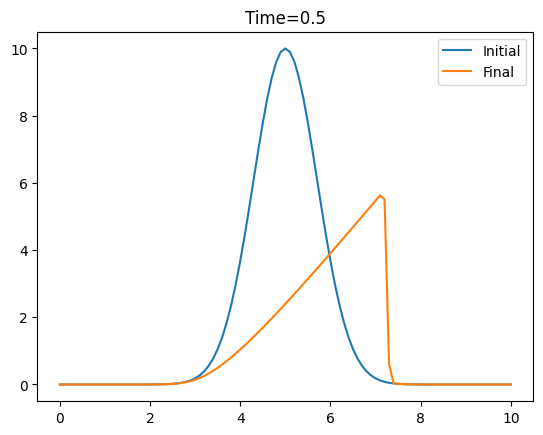

In [45]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.legend()
plt.show()

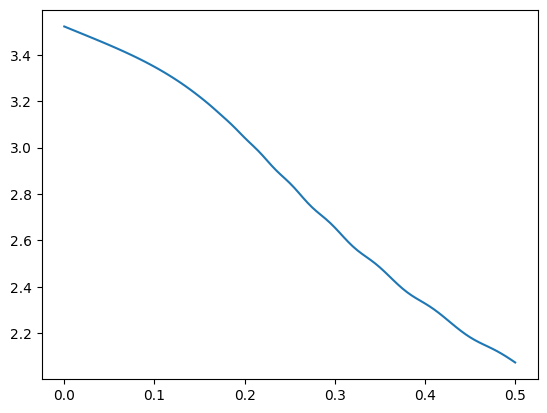

In [46]:
plt.plot(time,l2norm)
plt.show()

In [47]:
# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(len(files))

['fig_00040.png', 'fig_00060.png', 'fig_00100.png', 'fig_00020.png', 'fig_00090.png', 'fig_00010.png', 'fig_00070.png', 'fig_00080.png', 'fig_00050.png', 'fig_00000.png', 'fig_00030.png'] 

11


In [48]:
import imageio
with imageio.get_writer(f'./images/movie_non_cons.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(f'{directory}/'+file)
        writer.append_data(image)
        
files=[]

/tmp/ipykernel_128713/59185873.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{directory}/'+file)


In [50]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images/movie_non_cons.mp4" type="video/mp4">
</video></div>""")

### Increase resolution and compare

nx=101, dx=0.10000, dt=0.00500, Number of iterations=100
nx=131, dx=0.07692, dt=0.00385, Number of iterations=130
nx=151, dx=0.06667, dt=0.00333, Number of iterations=150
nx=171, dx=0.05882, dt=0.00294, Number of iterations=170
nx=201, dx=0.05000, dt=0.00250, Number of iterations=200
nx=251, dx=0.04000, dt=0.00200, Number of iterations=250
nx=301, dx=0.03333, dt=0.00167, Number of iterations=300
nx=501, dx=0.02000, dt=0.00100, Number of iterations=500
nx=701, dx=0.01429, dt=0.00071, Number of iterations=700
nx=901, dx=0.01111, dt=0.00056, Number of iterations=900


<Figure size 1800x1000 with 0 Axes>

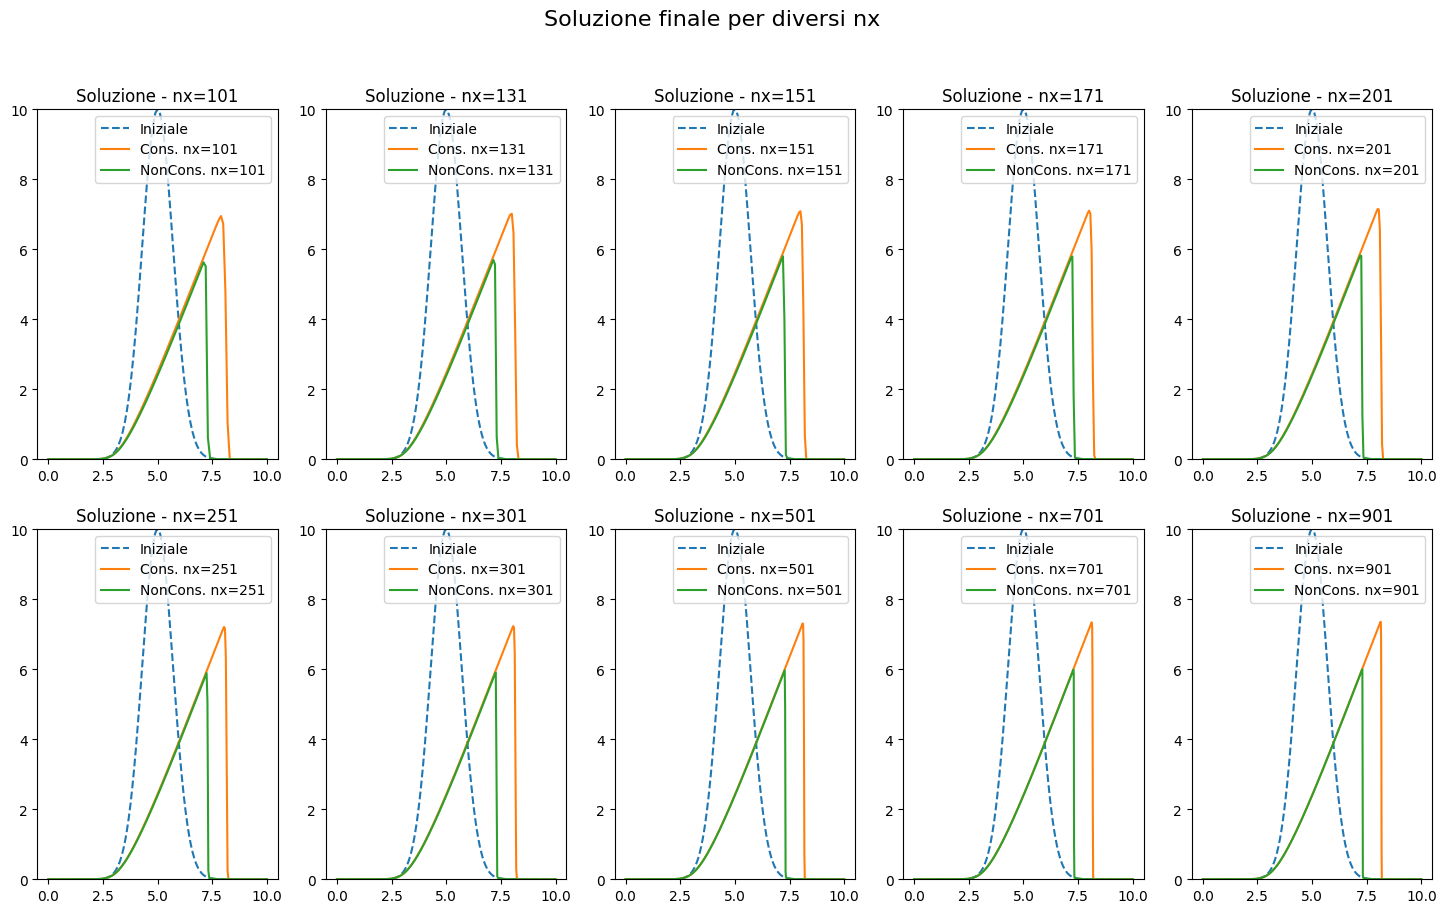

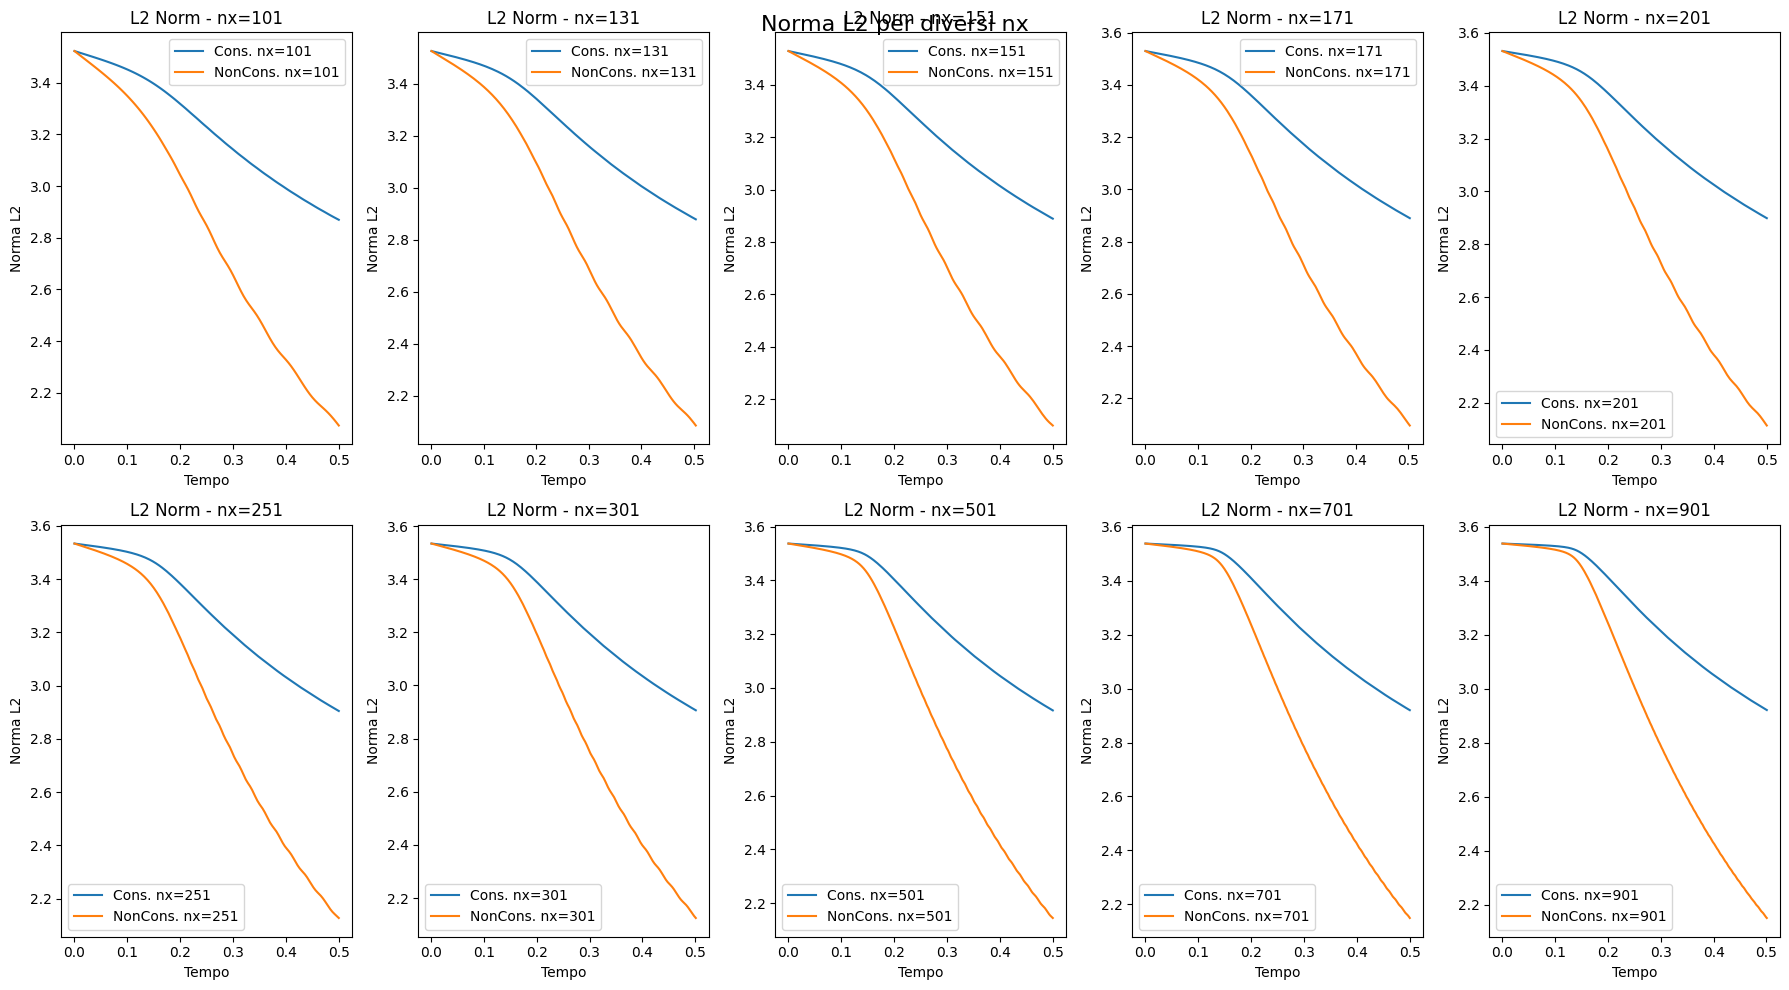

In [53]:
# Definizione della funzione per risolvere l'equazione con Lax-Friedrichs
def solve_burgers_cons(dt, dx, nx, t_final=0.5):
    x = np.linspace(0, 10, nx)
    x0 = 5
    u_initial = 10 * np.exp(-(x - x0) ** 2)

    u_current = u_initial.copy()
    l2norm = [np.sqrt(np.sum(u_current ** 2) / len(u_current))]
    time = [0.0]

    t = 0.0  

    while t < t_final:
        u_next = u_current - dt / dx * (0.5 * u_current ** 2 - 0.5 * np.roll(u_current, 1) ** 2)
        u_current = u_next.copy()
        t += dt
        l2norm.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))
        time.append(t)

    return x, u_initial, u_current, time, l2norm

def solve_burgers_noncons(dt, dx, nx, t_final=0.5):
    x = np.linspace(0, 10, nx)
    x0 = 5
    u_initial = 10 * np.exp(-(x - x0) ** 2)

    u_current = u_initial.copy()
    l2norm = [np.sqrt(np.sum(u_current ** 2) / len(u_current))]
    time = [0.0]

    t = 0.0  

    while t < t_final:
        u_next = u_current - dt / dx * u_current * (u_current - np.roll(u_current, 1))
        u_current = u_next.copy()
        t += dt
        l2norm.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))
        time.append(t)

    return x, u_initial, u_current, time, l2norm

# --- Eseguiamo i metodi per diversi nx ---
nx_values = [101, 131, 151, 171, 201, 251, 301, 501 , 701, 901]
L = 10.0   
cf = 0.5
t_final = 0.5

plt.figure(figsize=(18, 10))

# Creazione delle figure per i plot della soluzione e della norma L2
fig1, axs1 = plt.subplots(2, len(nx_values)//2, figsize=(18, 10))
fig2, axs2 = plt.subplots(2, len(nx_values)//2, figsize=(18, 10))

for i, nx in enumerate(nx_values):
    dx = L / (nx - 1)
    x = np.linspace(0, L, nx)
    x0 = 5
    u_initial = 10 * np.exp(-(x - x0) ** 2)

    dt = cf * dx / np.max(np.abs(u_initial))

    print(f'nx={nx}, dx={dx:.5f}, dt={dt:.5f}, Number of iterations={t_final / dt:.0f}')

    x_c, u_initial_c, u_final_c, time_c, l2norm_c = solve_burgers_cons(dt, dx, nx)
    x_nc, u_initial_nc, u_final_nc, time_nc, l2norm_nc = solve_burgers_noncons(dt, dx, nx)

    # Plot della soluzione finale
    ax1 = axs1[i // (len(nx_values)//2), i % (len(nx_values)//2)]
    ax1.plot(x_c, u_initial_c, '--', label="Iniziale")
    ax1.plot(x_c, u_final_c, label=f"Cons. nx={nx}")
    ax1.plot(x_nc, u_final_nc, label=f"NonCons. nx={nx}")
    ax1.set_ylim(0, 10)
    ax1.legend()
    ax1.set_title(f"Soluzione - nx={nx}")

    # Plot della norma L2
    ax2 = axs2[i // (len(nx_values)//2), i % (len(nx_values)//2)]
    ax2.plot(time_c, l2norm_c, label=f"Cons. nx={nx}")
    ax2.plot(time_nc, l2norm_nc, label=f"NonCons. nx={nx}")
    ax2.set_xlabel("Tempo")
    ax2.set_ylabel("Norma L2")
    ax2.legend()
    ax2.set_title(f"L2 Norm - nx={nx}")

plt.tight_layout()
fig1.suptitle("Soluzione finale per diversi nx", fontsize=16)
fig2.suptitle("Norma L2 per diversi nx", fontsize=16)

plt.show()



## OPTIONAL (da fare)